# Demo

In [1]:
%load_ext autoreload
%autoreload 2

import torch
from matplotlib import pyplot as plt
from PIL import Image
import torchvision

## Conditional Variational Autoencoder

In [2]:
# !python train_cVAE.py #skip this if the model has been trained before

In [3]:
from models.cvae import cVAE
from datasets.inpainting import Inpainting, read_mask_from_image

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

net = cVAE((3, 64, 64), 2, nhid=100, ncond=16)
checkpoint = torch.load("cVAE.pt", map_location = device)
net.load_state_dict(checkpoint["net"])
net.to(device)
net.eval()

cVAE(
  (encoder): Encoder(
    (encode): Sequential(
      (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
      (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (14): Flatten()
      (15): MLP(
    

In [5]:
sum(p.numel() for p in net.parameters())

6201579

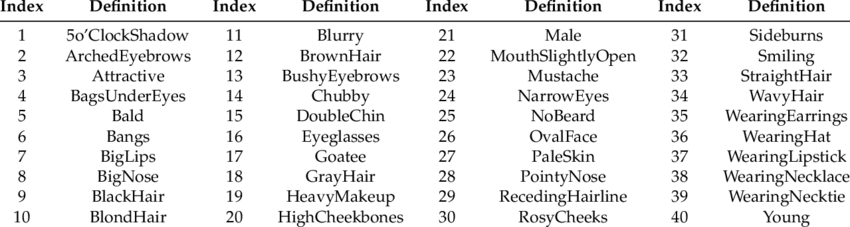

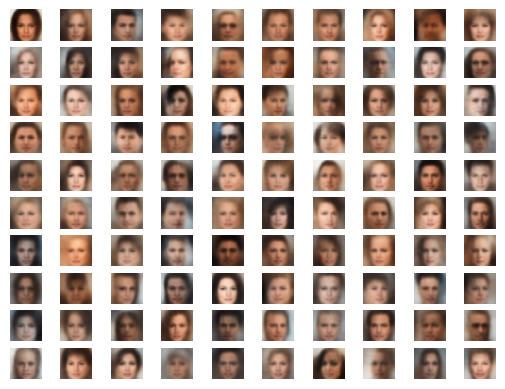

In [31]:
for i in range(100):
    plt.subplot(10, 10, i + 1)
    attributes = torch.tensor([0])
    with torch.no_grad():
        x = net.generate(attributes)
    plt.imshow(x.squeeze(0).cpu().permute(1,2,0).numpy())
    plt.axis("off")
plt.show()

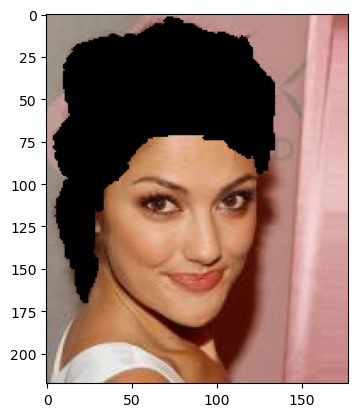

In [32]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize((109, 89), antialias=False),   # (3, 218, 178) -> (3, 109, 89)
    torchvision.transforms.CenterCrop((64, 64)),
])

img = Image.open("./test_pics/000118_removed_hair.png")
plt.imshow(img)

img_tensor = transform(img)
img_tensor = img_tensor.unsqueeze(0)
img_tensor = img_tensor.to(device)
img_tensor = img_tensor[:,0:3,:,:]


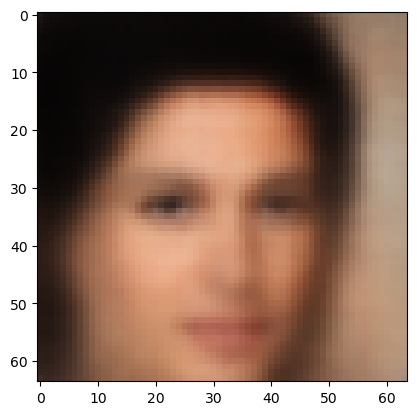

In [37]:
attributes = torch.tensor([0]).to(device)

with torch.no_grad():
    reconstruction, _, _ = net(img_tensor, attributes)
    
plt.imshow(reconstruction.squeeze(0).cpu().permute(1,2,0).numpy())

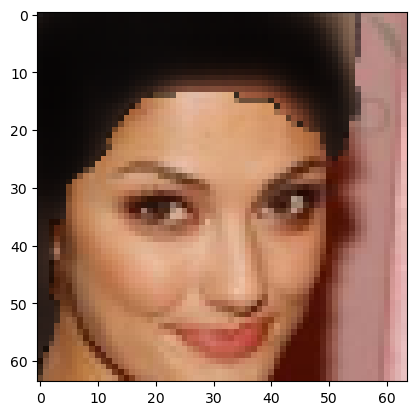

In [34]:
from datasets.inpainting import Inpainting, read_mask_from_image
inpainting = Inpainting(img_tensor, read_mask_from_image(img_tensor))
result = inpainting.inpaint(reconstruction)

plt.imshow(result.cpu().permute(1,2,0).numpy())
